# Ford GoBike Rides in 2018
## by Reema Mohsin

## Preliminary Wrangling

> This data presents individual bike rides from the GoBike system in the San Francisco Bay Area. My analysis will be conducted on all rides in 2018. I will specifically look at the trends in number of rides and duration of rides by user type from month to month.

## Distribution of Ride Duration

The distribution of ride duration follows a logarthimic scale, with most rides between 5 and 10 minutes long.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline
#list of all 2018 files
datafiles = ['201801-fordgobike-tripdata.csv',"201802-fordgobike-tripdata.csv",
            "201803-fordgobike-tripdata.csv","201804-fordgobike-tripdata.csv",
            "201805-fordgobike-tripdata.csv","201806-fordgobike-tripdata.csv",
            "201807-fordgobike-tripdata.csv","201808-fordgobike-tripdata.csv",
            "201809-fordgobike-tripdata.csv","201810-fordgobike-tripdata.csv",
            "201811-fordgobike-tripdata.csv","201812-fordgobike-tripdata.csv"]

df = pd.DataFrame()
#read all files into a df
for file in datafiles:
    if df.empty:
        df = pd.read_csv(file)
    else:
        df1 = pd.read_csv(file)
        df = pd.concat([df,df1],ignore_index=True)
        
    #keep track of rows on each iteration
    #print("Number of rows in df: {} after loading {}".format(df.shape[0],file))
    
df.reset_index(drop=True, inplace=True)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_month'] = pd.DatetimeIndex(df['start_time']).month
df['end_month'] = pd.DatetimeIndex(df['end_time']).month
df.user_type = df.user_type.astype('category')
df['duration_sec'] = df.duration_sec.astype('float')
df['duration_min'] = df.duration_sec / 60

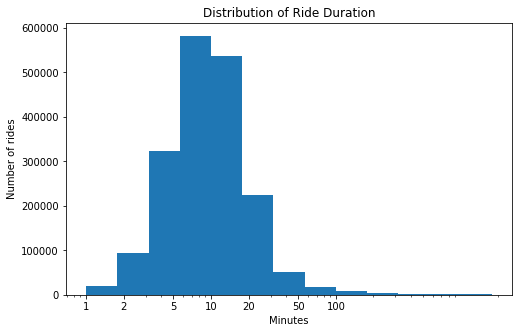

In [4]:
#transform plot with the log function
log_binsize = 0.25
bins = 10 ** np.arange(0, np.log10(df.duration_min.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100], [1,2,5,10,20,50,100])
plt.title('Distribution of Ride Duration');
plt.ylabel('Number of rides');
plt.xlabel('Minutes');

## Distribution of User Type

There are two different user types among riders in the dataset: Customers and Subscribers. Subscribers acount for about 80% of all bike rides in 2018.

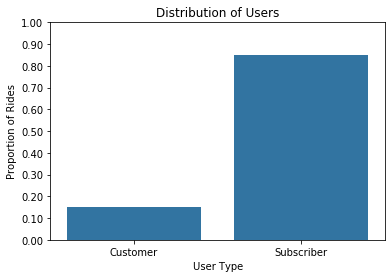

In [5]:
#create proportions to understand relaative frequency
n = df.shape[0]
max_count = df.user_type.value_counts().max()
max_prop = max_count/n

tick_props = np.arange(0,max_prop+.2,0.1)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = df.user_type, color = base_color);
plt.yticks(tick_props*n,tick_names);
plt.title('Distribution of Users');
plt.xlabel('User Type')
plt.ylabel('Proportion of Rides');

## Distribution of Months

Over the course of the 2018, the number of rides was lowest in January and gradually trended upwards. There is a peak in July after which it gradually trends downwards. However, the month of October is a standout month, with the highest number of bike rides all year. 

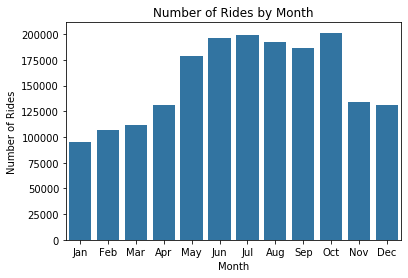

In [6]:
sb.countplot(data = df, x = 'start_month', color = base_color);
plt.title('Number of Rides by Month');
plt.xlabel('Month');
plt.ylabel('Number of Rides');
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

## Duration Time by Month

From month to month, the average duration time of a bike ride still appears to be around 10 minutes.

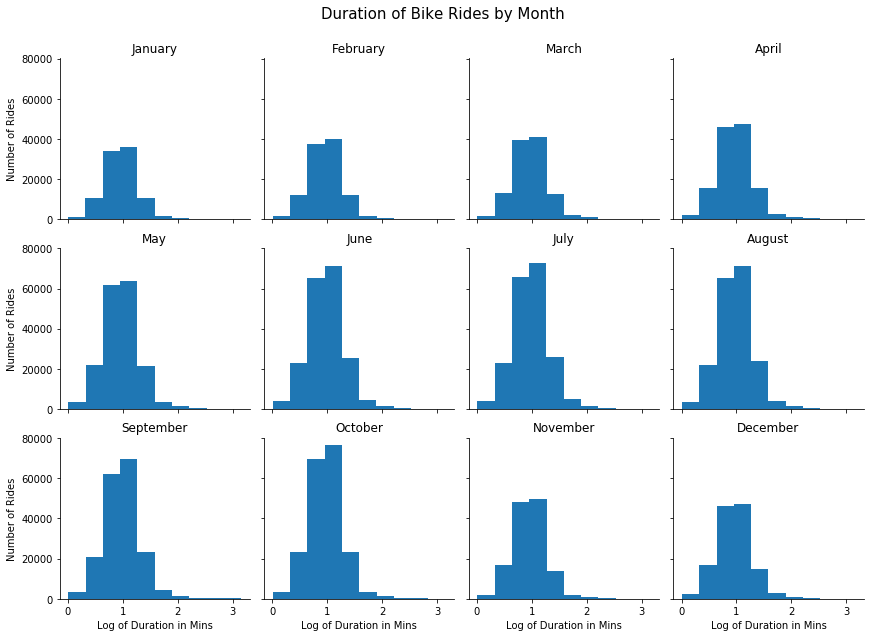

In [7]:
df['duration_min_log'] = np.log10(df['duration_min'])
g = sb.FacetGrid(data = df, col = 'start_month', col_wrap = 4);
g.map(plt.hist, 'duration_min_log');
g.fig.suptitle('Duration of Bike Rides by Month',size=15);
g.fig.subplots_adjust(top=0.9);
axes = g.axes.flatten()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(12):
    axes[i].set_title(months[i]);
    
axes[0].set_ylabel('Number of Rides');
axes[4].set_ylabel('Number of Rides');
axes[8].set_ylabel('Number of Rides');
axes[8].set_xlabel('Log of Duration in Mins');
axes[9].set_xlabel('Log of Duration in Mins');
axes[10].set_xlabel('Log of Duration in Mins');
axes[11].set_xlabel('Log of Duration in Mins');

## Duration Time by User Type

Though Subscribers tend to take many more trips than Customers, Customers tend to take longer trips on average. The mode duration for Subscribers is under 10 minutes while the mode duration for Customers is over 10 minutes. 

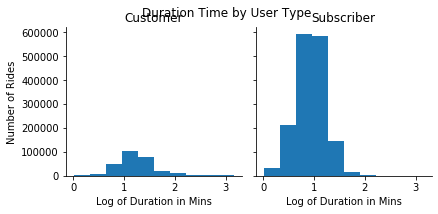

In [8]:
g = sb.FacetGrid(data = df, col = 'user_type');
g.fig.subplots_adjust(top=0.9);
g.map(plt.hist, 'duration_min_log');
axes = g.axes.flatten()
g.fig.suptitle('Duration Time by User Type',size=12);
axes[0].set_title('Customer');
axes[1].set_title('Subscriber');
axes[0].set_xlabel('Log of Duration in Mins');
axes[1].set_xlabel('Log of Duration in Mins');
axes[0].set_ylabel('Number of Rides');

## Number of Rides by Month and User Type

Both Customers and Subscribers take more rides in the summer months and fewer rides in the winter months; however, one key observation to note is that October is by far the most popular month for rides for Subscribers only.

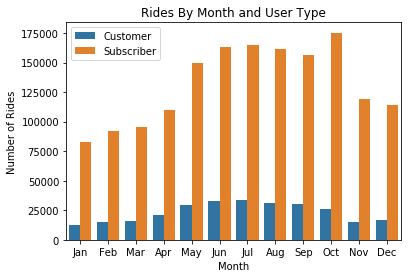

In [9]:
sb.countplot(data = df, x = 'start_month', hue = 'user_type');
plt.title('Rides By Month and User Type');
plt.legend(title='');
plt.xlabel('Month');
plt.ylabel('Number of Rides');
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

## Combining it All Together

Plotting all three variable together at once illustrates that Customers consistently take longer trips than Subscribers every month. 

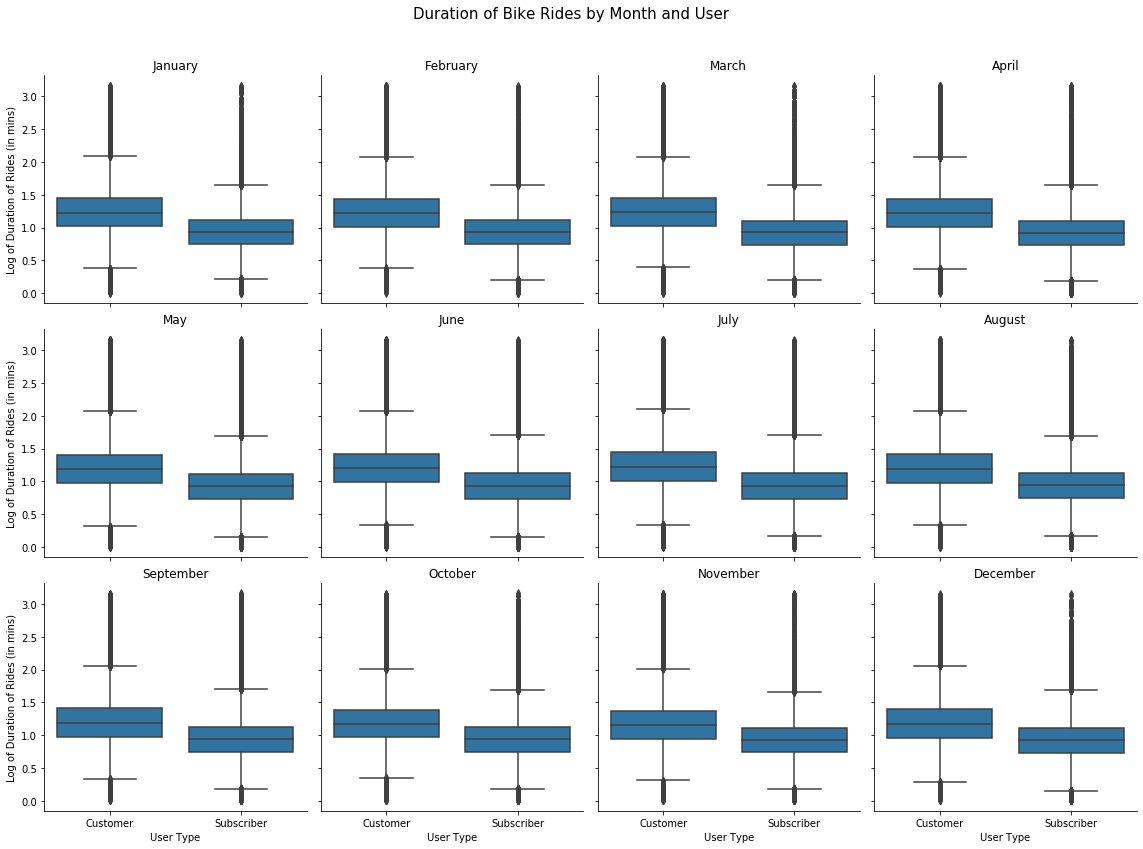

In [12]:
g = sb.FacetGrid(data = df, col = 'start_month', height = 4, col_wrap = 4);
g.map(sb.boxplot, 'user_type', 'duration_min_log',order=None);
g.fig.suptitle('Duration of Bike Rides by Month and User', size=15);
axes = g.axes.flatten()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(12):
    axes[i].set_title(months[i]);
    
axes[0].set_ylabel('Log of Duration of Rides (in mins)');
axes[4].set_ylabel('Log of Duration of Rides (in mins)');
axes[8].set_ylabel('Log of Duration of Rides (in mins)');
axes[8].set_xlabel('User Type');
axes[9].set_xlabel('User Type');
axes[10].set_xlabel('User Type');
axes[11].set_xlabel('User Type');
g.fig.subplots_adjust(top=.9);